In [1]:
import sys
sys.path.append("../..")
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import random
%matplotlib inline

In [2]:
import torch
from torch import nn
from torch import distributions
from torch.nn.parameter import Parameter
from train import train
from train import train_rnis
# from models_new import Renorm_Dynamic
# from models_new import Rnis_Dynamic
from train import count_parameters
from dynamic_models_sis_new import Simple_Spring_Model
from datetime import datetime
t0 = datetime.now()


use_cuda = torch.cuda.is_available()
device = torch.device('cuda:0') if use_cuda else torch.device('cpu')
device

device(type='cuda', index=0)

# Generate data

In [3]:
# try another init part sample
experiments = 5
mul_batch_size = [0,10,4500,1500]
#mul_batch_size = [0,5000,3000,1000]
sigma = 0.03
rou = -0.5
steps = 7
sz = 4
scale = 2
L = 1
mae2_w = 3
T_total = 40001
dt = 0.01

eis_nis_e = np.zeros([experiments,T_total//500+1])
losses_nis_e = np.zeros([experiments,T_total//500+1])
MAEs_mstep_nis_e = np.zeros([experiments,T_total//500+1])
eis_nisp_e = np.zeros([experiments,T_total//500+1])
losses_nisp_e = np.zeros([experiments,T_total//500+1])
MAEs_mstep_nisp_e = np.zeros([experiments,T_total//500+1])
eis_rnis_e = np.zeros([experiments,T_total//500+1])
losses_rnis_e = np.zeros([experiments,T_total//500+1])
MAEs_mstep_rnis_e = np.zeros([experiments,T_total//500+1])

# Train RNIS

In [4]:
# nis+
hidden_units_dyn = 32
for e in range(experiments):
    seed = 1 + e
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    spring = Simple_Spring_Model(device=device)
    test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) #sir
    train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)
    
    eis_rnis, term1s_rnis, term2s_rnis, losses_rnis, MAEs_mstep_rnis, net_rnis = train(train_data=train_data, test_data=test_data, 
                                                                                        sz=sz, scale=scale, mae2_w=mae2_w, T2=T_total,
                                                                                        T1 = 3001, sigma=sigma, rou=rou, dt=dt, 
                                                                                        L=L, hidden_units_dyn = hidden_units_dyn,
                                                                                        framework = 'rnis')
    
    eis_rnis_e[e,:] = eis_rnis
    losses_rnis_e[e,:] = losses_rnis
    MAEs_mstep_rnis_e[e,:] = MAEs_mstep_rnis

30876
check point-------o_0-> 20:06:58.054522; lasting 0:00:03.160273 seconds
Epoch: 0
Train loss: 0.4830
dEI: 0.7860
term1: 0.1553
term2: 1.4167
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 20:06:58.781669; lasting 0:00:00.727147 seconds
check point-------o_0-> 20:07:11.363561; lasting 0:00:12.581892 seconds
Epoch: 500
Train loss: 0.0922
dEI: 1.1396
term1: 0.7944
term2: 1.4849
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 20:07:12.083444; lasting 0:00:00.719883 seconds
check point-------o_0-> 20:07:24.709925; lasting 0:00:12.626481 seconds
Epoch: 1000
Train loss: 0.0444
dEI: 1.4537
term1: 1.4090
term2: 1.4985
Test multistep loss: 0.0000
---------------------------------------------------------------------------------------------------

# Train NIS

In [5]:
# nis
for e in range(experiments):
    seed = 1 + e
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    spring = Simple_Spring_Model(device=device)
    test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) 
    train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)
    
    eis_nis, term1s_nis, term2s_nis, losses_nis, MAEs_mstep_nis, net_nis = train(train_data=train_data, test_data=test_data, 
                                                                        sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                        mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis')
    eis_nis_e[e,:] = eis_nis
    losses_nis_e[e,:] = losses_nis
    MAEs_mstep_nis_e[e,:] = MAEs_mstep_nis

32922
check point-------o_0-> 22:03:13.550472; lasting 0:00:01.070460 seconds
Epoch: 0
Train loss: 0.5459
dEI: 0.2545
term1: -0.8790
term2: 1.3880
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 22:03:14.346191; lasting 0:00:00.795719 seconds
check point-------o_0-> 22:03:27.007686; lasting 0:00:12.661495 seconds
Epoch: 500
Train loss: 0.1290
dEI: 0.7403
term1: -0.0454
term2: 1.5260
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 22:03:27.803737; lasting 0:00:00.796051 seconds
check point-------o_0-> 22:03:40.464706; lasting 0:00:12.660969 seconds
Epoch: 1000
Train loss: 0.0469
dEI: 1.1066
term1: 0.6358
term2: 1.5774
Test multistep loss: 0.0000
-------------------------------------------------------------------------------------------------

check point-------o_0-> 22:04:20.762669; lasting 0:00:12.683779 seconds
Epoch: 2500
Train loss: 0.0314
dEI: 1.6073
term1: 1.6065
term2: 1.6081
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 22:04:21.540549; lasting 0:00:00.777880 seconds
check point-------o_0-> 22:04:34.261005; lasting 0:00:12.720456 seconds
Epoch: 3000
Train loss: 0.0310
dEI: 1.6901
term1: 1.7710
term2: 1.6093
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 22:04:35.003656; lasting 0:00:00.742651 seconds
check point-------o_0-> 22:04:47.673239; lasting 0:00:12.669583 seconds
Epoch: 3500
dEI: 1.7611
term1: 1.9123
term2: 1.6100
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------

# Train NIS+

In [6]:
# nis+
for e in range(experiments):
    seed = 1 + e
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    spring = Simple_Spring_Model(device=device)
    test_data = spring.generate_multistep_sir(size_list=[500,500], steps=10, sigma=sigma, rou=rou,lam=1,miu=0.5,dt=dt) #sir
    train_data = spring.generate_multistep_sir(size_list=mul_batch_size, steps=steps, sigma=sigma,rou=rou,lam=1,miu=0.5,dt=dt)
    
    eis_nisp, term1s_nisp, term2s_nisp, losses_nisp, MAEs_mstep_nisp, net_nisp = train(train_data=train_data, test_data=test_data, 
                                                                    sigma=sigma, rou=rou, sz=sz, scale=scale, L=L, 
                                                                    mae2_w=mae2_w, dt=dt, T2=T_total,framework='nis+')
    eis_nisp_e[e,:] = eis_nisp
    losses_nisp_e[e,:] = losses_nisp
    MAEs_mstep_nisp_e[e,:] = MAEs_mstep_nisp

37404
check point-------o_0-> 23:33:08.693826; lasting 0:00:01.071814 seconds
Epoch: 0
Train loss: 0.5459
dEI: 0.2545
term1: -0.8790
term2: 1.3880
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 23:33:09.474638; lasting 0:00:00.780812 seconds


check point-------o_0-> 23:33:22.146264; lasting 0:00:12.671626 seconds
Epoch: 500
Train loss: 0.1290
dEI: 0.7403
term1: -0.0454
term2: 1.5260
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 23:33:22.952100; lasting 0:00:00.805836 seconds
check point-------o_0-> 23:33:35.645784; lasting 0:00:12.693684 seconds
Epoch: 1000
Train loss: 0.0469
dEI: 1.1066
term1: 0.6358
term2: 1.5774
Test multistep loss: 0.0000
------------------------------------------------------------------------------------------------------------------------
check point-------o_1-> 23:33:36.383746; lasting 0:00:00.737962 seconds
check point-------o_0-> 23:33:49.109437; lasting 0:00:12.725691 seconds
Epoch: 1500
Train loss: 0.0364
dEI: 1.3361
term1: 1.0766
term2: 1.5957
Test multistep loss: 0.0000
-----------------------------------------------------------------------------------------------------

# Results

In [7]:
print(count_parameters(net_rnis),count_parameters(net_nis),count_parameters(net_nisp))

30876 32922 37404


In [8]:
np.save('results/eis_nis_e.npy', eis_nis_e)
np.save('results/losses_nis_e.npy', losses_nis_e)
np.save('results/MAEs_mstep_nis_e.npy', MAEs_mstep_nis_e)
np.save('results/eis_nisp_e.npy', eis_nisp_e)
np.save('results/losses_nisp_e.npy', losses_nisp_e)
np.save('results/MAEs_mstep_nisp_e.npy', MAEs_mstep_nisp_e)
np.save('results/eis_rnis_e.npy', eis_rnis_e)
np.save('results/losses_rnis_e.npy', losses_rnis_e)
np.save('results/MAEs_mstep_rnis_e.npy', MAEs_mstep_rnis_e)

In [9]:
# 定义一个字典来存储文件名和对应的变量名
file_dict = {
    'eis_nis_e': 'results/eis_nis_e.npy',
    'losses_nis_e': 'results/losses_nis_e.npy',
    'MAEs_mstep_nis_e': 'results/MAEs_mstep_nis_e.npy',
    'eis_nisp_e': 'results/eis_nisp_e.npy',
    'losses_nisp_e': 'results/losses_nisp_e.npy',
    'MAEs_mstep_nisp_e': 'results/MAEs_mstep_nisp_e.npy',
    'eis_rnis_e': 'results/eis_rnis_e.npy',
    'losses_rnis_e': 'results/losses_rnis_e.npy',
    'MAEs_mstep_rnis_e': 'results/MAEs_mstep_rnis_e.npy'
}

# 创建一个字典来存储加载的数据
data_dict = {}

# 加载每个文件并将数据存储在字典中
for var_name, file_path in file_dict.items():
    data_dict[var_name] = np.load(file_path)

# 打印每个变量的数据和形状
for var_name, data in data_dict.items():
    print(f"{var_name} shape: {data.shape}")

eis_nis_e shape: (5, 81)
losses_nis_e shape: (5, 81)
MAEs_mstep_nis_e shape: (5, 81)
eis_nisp_e shape: (5, 81)
losses_nisp_e shape: (5, 81)
MAEs_mstep_nisp_e shape: (5, 81)
eis_rnis_e shape: (5, 81)
losses_rnis_e shape: (5, 81)
MAEs_mstep_rnis_e shape: (5, 81)


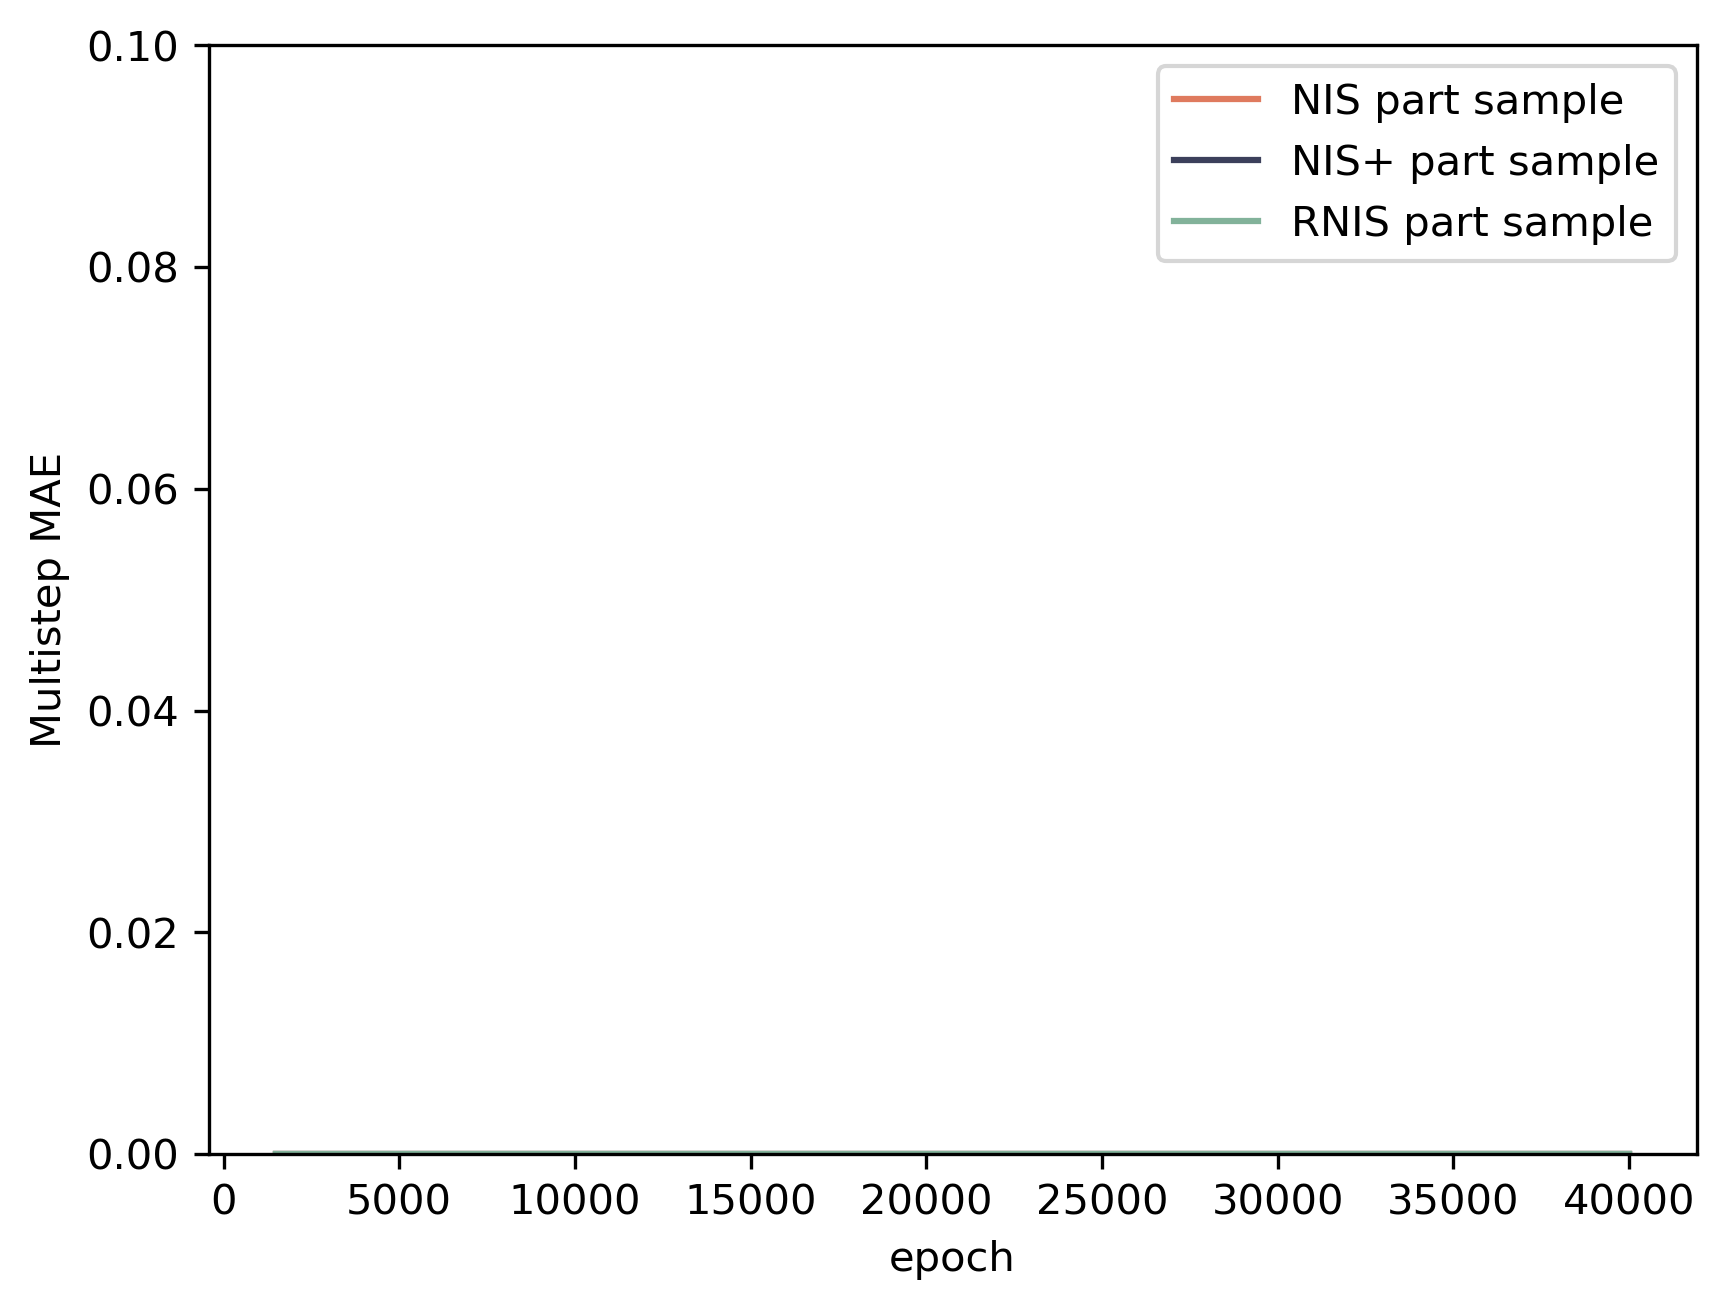

In [10]:
plt.figure(dpi=300)
color_label = ['#F4F1DE', '#DF7A5E', '#3C405B', '#82B29A', '#F2CC8E', '#A8DADC', '#457B9D', '#1D3557']
lens=len(MAEs_mstep_nis_e[0,3:])
timesteps = np.arange(len(MAEs_mstep_nis_e[0,:]))[3:]*500
compare1=np.cumsum(data_dict['MAEs_mstep_nis_e'][:,3:],1)/np.linspace(1, lens, lens)
compare2=np.cumsum(data_dict['MAEs_mstep_nisp_e'][:,3:],1)/np.linspace(1, lens, lens)
compare3=np.cumsum(data_dict['MAEs_mstep_rnis_e'][:,3:],1)/np.linspace(1, lens, lens)
means_nis = np.mean(compare1,axis=0)
stds_nis = np.std(compare1,axis=0)
means_nisp = np.mean(compare2,axis=0)
stds_nisp = np.std(compare2,axis=0)
means_rnis = np.mean(compare3,axis=0)
stds_rnis = np.std(compare3,axis=0)
plt.plot(timesteps, means_nis, label='NIS part sample',color=color_label[1])
plt.fill_between(timesteps, means_nis-stds_nis, means_nis+stds_nis,alpha=0.25,color=color_label[1])
plt.plot(timesteps, means_nisp, label='NIS+ part sample',color=color_label[2])
plt.fill_between(timesteps, means_nisp-stds_nisp, means_nisp+stds_nisp,alpha=0.25,color=color_label[2])
plt.plot(timesteps, means_rnis, label='RNIS part sample',color=color_label[3])
plt.fill_between(timesteps, means_rnis-stds_rnis, means_rnis+stds_rnis,alpha=0.25,color=color_label[3])
plt.legend()
plt.xlabel("epoch")
plt.ylabel('Multistep MAE')
plt.ylim([0,0.1])
plt.show()

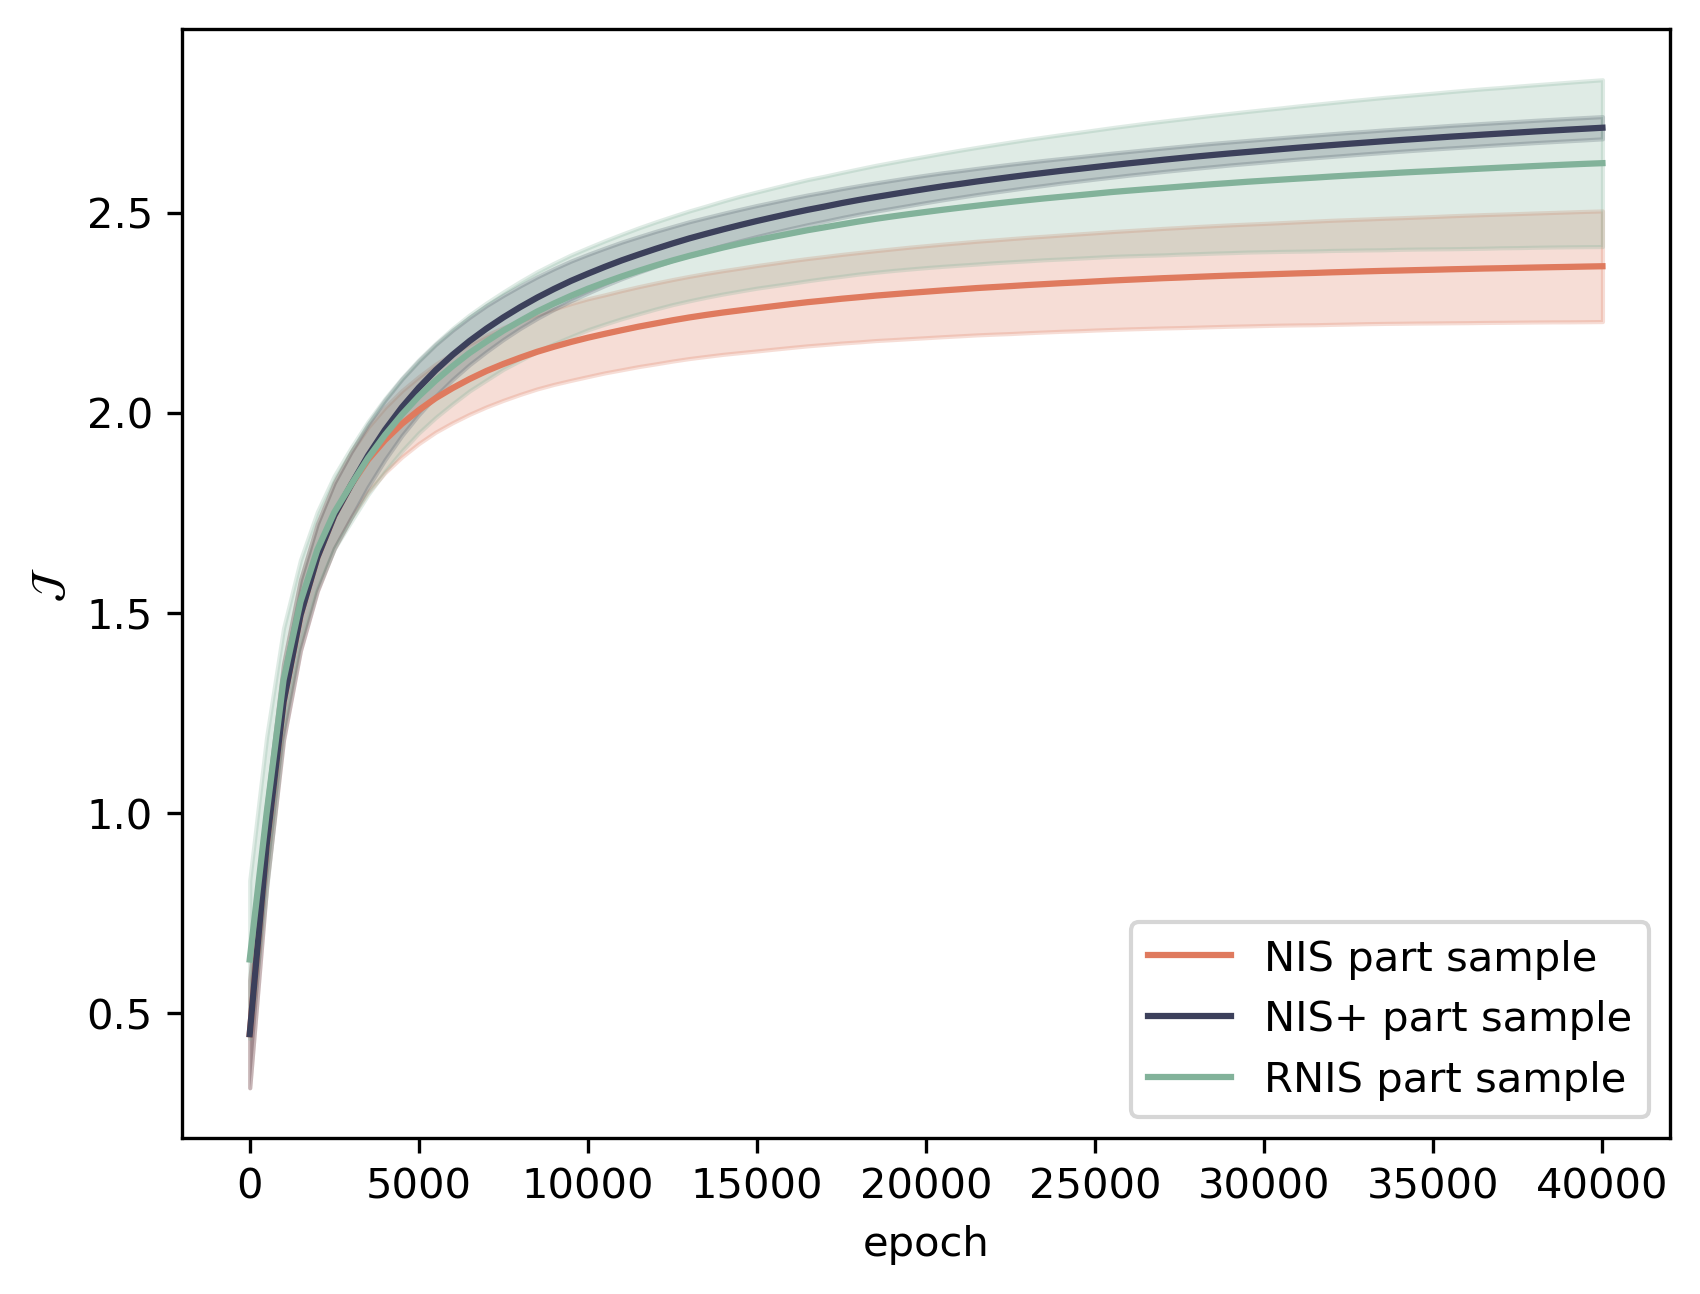

In [11]:
plt.figure(dpi=300)
color_label = ['#F4F1DE', '#DF7A5E', '#3C405B', '#82B29A', '#F2CC8E', '#A8DADC', '#457B9D', '#1D3557']
timesteps = np.arange(len(eis_nis))*500
means_nis = np.mean(data_dict['eis_nis_e'],axis=0)
stds_nis = np.std(data_dict['eis_nis_e'],axis=0)
means_nisp = np.mean(data_dict['eis_nisp_e'],axis=0)
stds_nisp = np.std(data_dict['eis_nisp_e'],axis=0)
means_rnis = np.mean(data_dict['eis_rnis_e'],axis=0)
stds_rnis = np.std(data_dict['eis_rnis_e'],axis=0)
plt.plot(timesteps, means_nis, label='NIS part sample',color=color_label[1])
plt.fill_between(timesteps, means_nis-stds_nis, means_nis+stds_nis,alpha=0.25,color=color_label[1])
plt.plot(timesteps, means_nisp, label='NIS+ part sample',color=color_label[2])
plt.fill_between(timesteps, means_nisp-stds_nisp, means_nisp+stds_nisp,alpha=0.25,color=color_label[2])
plt.plot(timesteps, means_rnis, label='RNIS part sample',color=color_label[3])
plt.fill_between(timesteps, means_rnis-stds_rnis, means_rnis+stds_rnis,alpha=0.25,color=color_label[3])
plt.legend()
plt.xlabel("epoch")
plt.ylabel(r'$\mathcal{J}$')
plt.show()

In [12]:
for name, param in net_rnis.flow.named_parameters():
    print(name, param.data)

mask tensor([[0., 0., 1., 1.],
        [1., 1., 0., 0.],
        [0., 0., 1., 1.],
        [1., 1., 0., 0.],
        [0., 0., 1., 1.],
        [1., 1., 0., 0.]], device='cuda:0')
t.0.0.weight tensor([[-0.0610, -0.3622,  0.1430, -0.0936],
        [-0.1058,  0.4080, -0.0798, -0.2330],
        [ 0.3892,  0.2309,  0.2106,  0.2663],
        [-0.3578, -0.4483, -0.3929, -0.1431],
        [ 0.0136,  0.3073, -0.1656, -0.4651],
        [ 0.2187, -0.0897, -0.3187, -0.0262],
        [-0.4924, -0.3896, -0.2409,  0.2811],
        [-0.4075, -0.3010, -0.0049, -0.0668],
        [ 0.2313,  0.3630,  0.1590, -0.2508],
        [ 0.3623, -0.0128, -0.4500, -0.4151],
        [ 0.2882, -0.1107,  0.3045,  0.0157],
        [ 0.1817,  0.4001, -0.1552, -0.4293],
        [ 0.4638,  0.0535,  0.0277,  0.2749],
        [ 0.1008, -0.4497, -0.3857,  0.1961],
        [-0.2242,  0.4410,  0.4363,  0.3263],
        [ 0.1150, -0.1915, -0.2906, -0.0133],
        [-0.2272,  0.3899,  0.1031, -0.1124],
        [-0.1308,  0.4895,